In [13]:
import numpy as np
import pandas as pd

from keras.datasets import fashion_mnist
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

from keras.models import Sequential

In [15]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [16]:
x_train.reshape(-1,28,28,1)
x_test.reshape(-1,28,28,1)
# x_train.astype(np.float32).reshape(-1,28,28,1)
# x_test.astype(np.float32).reshape(-1,28,28,1)

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [18]:
model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [21]:
model.fit(x_train.astype(np.float32),y_train.astype(np.float32),epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1750 - accuracy: 0.9358 - val_loss: 0.3728 - val_accuracy: 0.8899
Epoch 2/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1584 - accuracy: 0.9420 - val_loss: 0.3780 - val_accuracy: 0.8988
Epoch 3/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1421 - accuracy: 0.9482 - val_loss: 0.4049 - val_accuracy: 0.8934
Epoch 4/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1249 - accuracy: 0.9538 - val_loss: 0.4598 - val_accuracy: 0.8873
Epoch 5/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.1130 - accuracy: 0.9575 - val_loss: 0.5620 - val_accuracy: 0.8906


In [23]:
loss,accuracy=model.evaluate(x_test,y_test)
predictions=model.predict(x_test[:3])

1/1 [==============================] - 0s 117ms/step


In [24]:
labels=['t-shirt','trousers','pull-over','dress','coat','sandal','shirt','sneaker','bag','ankle_boots']

Image number :1 Label is : ankle_boots and Confidence is 100.00%


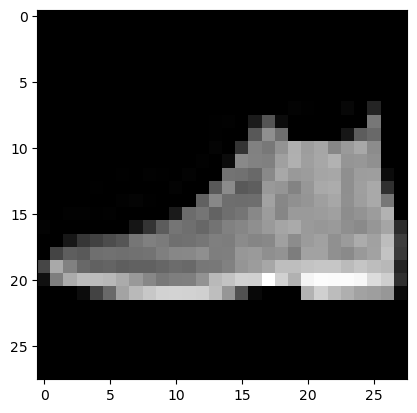

Image number :2 Label is : pull-over and Confidence is 100.00%


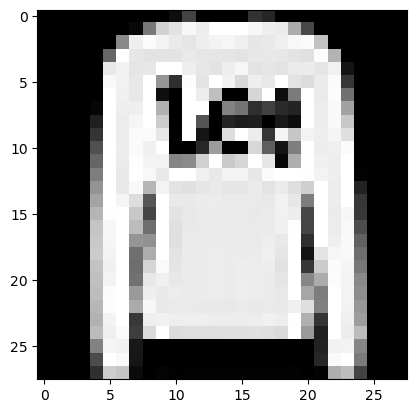

Image number :3 Label is : trousers and Confidence is 100.00%


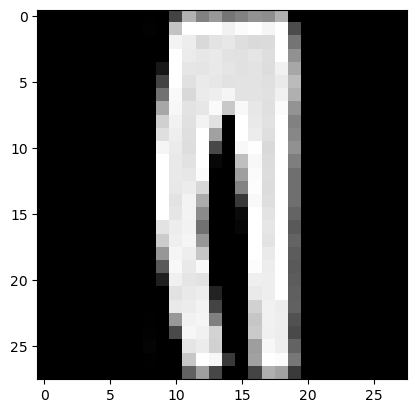

In [29]:
import matplotlib.pyplot as plt
for i ,pre in enumerate(predictions):
    index=np.argmax(pre)
    label=labels[index]
    confidence=pre[index]
    
    print(f"Image number :{i+1} Label is : {label} and Confidence is {confidence*100:.2f}%")
    image=np.squeeze(x_test[i])
    plt.imshow(image,cmap='gray')
    plt.show()